# frozen lake

## The Story
Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following:
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

Link: https://gym.openai.com/envs/FrozenLake-v0/

In [17]:
## setup
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt #to plot a graph

In [18]:
# Creating The Environment
env = gym.make("FrozenLake-v0")

In [19]:
# create the Q-Table
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

#SFFF FHFH FFFH HFFG x16 rows x 4 cols
q_table = np.zeros((state_space_size, action_space_size))

#observation types: Discrete, Box, or pixels (which is usually a Box(0, 255, [height, width, 3]) for RGB pixels).


print("\n Q Table")
print(q_table) # check all zero'd table


 Q Table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [20]:
# Set learning params
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1 #alpha
discount_rate = 0.99 #gamma

#exploration-exploitation (aka epsilon-greedy policy)
exploration_rate = 1 #epsilon
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001 #was 0.01 but changed after testing

In [21]:
# Q-learning algorithm
rewards_all_episodes = [] #list to hold our rewards
for episode in range(num_episodes):
    # initialize new episode params
    state = env.reset() #reset the environment back to starting state
    done = False #used to tell when episode is finished
    rewards_current_episode = 0 #used to track rewards in current episode 

    for step in range(max_steps_per_episode): 
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0,1) #set to random number
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])#use the highest Q value in the current state
        else:
            action = env.action_space.sample()#select a random ation
        
         # Take new action
        #use step to tell the environment an action was taken
        #step will return a tuple (info is used if you want to debug)
        new_state, reward, done, info = env.step(action)

        #Update Q-table
        q_table[state,action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        #Set new state
        state = new_state
        #Add new reward
        rewards_current_episode += reward
        if done == True:
            break

    # Exploration rate decay
    #reduce the exploration rate from its current value after each episode
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)

In [22]:
#Watch our agent play Frozen Lake by playing the best action 
#from each state according to the Q-table

for episode in range(3):
    # initialize new episode params
    state = env.reset()
    done = False
    print("****EPISODE ", episode + 1, "*****\n\n\n\n")
    time.sleep(1)#we delay so we can see output on screen
    for step in range(max_steps_per_episode):
        #clear jupyter output and wait until clear
        clear_output(wait=True)
        # Show current state of environment on screen
        env.render()
        time.sleep(0.3)
        # Choose action with highest Q-value for current state
        action = np.argmax(q_table[state, :])
        new_state, reward, done, info = env.step(action)
        # Take new action

        if done:
            clear_output(wait=True)#clear juptyer output again
            env.render()
            if reward == 1:
                # Agent reached the goal and won episode
                print("****You're AI reached the goal!****")
                time.sleep(3)
            else:
                # Agent stepped in a hole and lost episode
                print("****You're AI fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
        # Set new state
        state = new_state
env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
****You're AI reached the goal!****


********Average reward per 1,000 Episodes********

1000 :  0.005
2000 :  0.18200000000000013
3000 :  0.4130000000000003
4000 :  0.5620000000000004
5000 :  0.6310000000000004
6000 :  0.6490000000000005
7000 :  0.6970000000000005
8000 :  0.6780000000000005
9000 :  0.6580000000000005
10000 :  0.7240000000000005


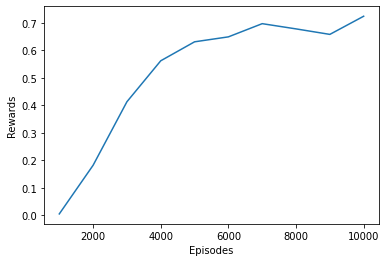



********Q-Table********

[[0.53942144 0.52526542 0.52438848 0.52517537]
 [0.23433206 0.42840238 0.3373085  0.51126717]
 [0.40314007 0.41616424 0.39866525 0.48091263]
 [0.31949134 0.24906815 0.28439161 0.46666286]
 [0.57955183 0.40819291 0.31310238 0.37930292]
 [0.         0.         0.         0.        ]
 [0.1927387  0.21138068 0.40695959 0.09971939]
 [0.         0.         0.         0.        ]
 [0.31169477 0.3809169  0.41712618 0.60327108]
 [0.51968203 0.65430129 0.3396092  0.33387091]
 [0.58757246 0.38972941 0.39964096 0.37790364]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.53669767 0.60962697 0.75375279 0.48923781]
 [0.7080501  0.84505905 0.79984559 0.76644073]
 [0.         0.         0.         0.        ]]


In [23]:
# Calculate and print the average reward per 1,000 episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000
plotx = []
ploty = []

print("********Average reward per 1,000 Episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000))) #see how our rewards are going after training
    plotx.append(count)
    ploty.append(sum(r/1000))
    count += 1000
plt.plot(plotx,ploty)
plt.ylabel("Rewards")
plt.xlabel("Episodes")
plt.show()

#print updated Q-table
print("\n\n********Q-Table********\n")
print(q_table)